In [1]:
# Here we install all the necessary libraries
#!pip install scikit-learn
#!pip install gensim
# Installation of all the required libraries
#!pip install accelerate -U
# Utility to optimize PyTorch models for various hardware
#!pip install transformers[torch]
# Hugging Face's transformers library with PyTorch support
#!pip install torch

In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from numpy import mean
#Classifers - Logistic Regression, SVC, Random Forest, KNN and MLP, are trained on the training data.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold, cross_val_score
#performance and evaluation of test data using metrics - accuracy score, confusion matrix, and classification report.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
#Import the Word2Vec model from gensim.models for creating word embeddings
from gensim.models import Word2Vec

In [4]:
#Random Forest Model
# Function to build and evaluate a Random Forest model
def build_model_RF(X_train, y_train, X_test, y_test, name_of_test):
    # Initialization and training a Random Forest model with specified parameters
    start_time = time.time()
    rfc = RandomForestClassifier()
    #parameters
    max_depth = [3, 5, 10, None]
    min_samples_leaf = [1, 5, 10]
    min_samples_split = [2, 10, 20]
    max_features = ['log2','sqrt']

    # Grid search parameters
    grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    # Best Model
    best_model = RandomForestClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print(
        "Test accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test)
    )

    # Printing the classification report
    print(classification_report(y_test, y_pred))
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # Printing precision, recall, fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Saving the best model
    with open('w2v_rf_model1.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [5]:
# Support Vector Machine model
# Function to build and evaluate a Support Vector Machine model
def build_model_SVC(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Initialization and training a Support Vector Machine model with specified parameters
    svc = SVC()
    #define parameters
    C = [0.1, 1, 10]
    gamma_val = ['scale', 'auto']
    kernel_val = ["rbf", "linear", "sigmoid"]

    # Grid search parameters
    grid = dict(C = C, gamma=gamma_val, kernel=kernel_val)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    # best model
    best_model = SVC(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)


    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # Printing the classification report
    print(classification_report(y_test, y_pred))
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Saving the best model
    with open('w2v_svc_model1.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [6]:
# Logistic Regression Model
# Function to build and evaluate a Logistic Regression model
def build_model_LR(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    log_reg = LogisticRegression()
    

    #define parameters
    solvers = ['newton-cg','lbfgs','saga'] #Suitable for large datasets
    penalty = ['l2','l1']
    c_values = [100, 10, 1.0, 0.1]
    max_iter = [100, 200, 300]

    #grid_search
    grid = dict(solver = solvers, penalty = penalty, C=c_values, max_iter=max_iter)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    #best model
    best_model = LogisticRegression(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # Printing the classification report
    print(classification_report(y_test, y_pred))  # Evaluating prediction ability
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))

    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Save best model
    with open('w2v_lr_model1.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [7]:
# Building KNN model to find the best model and testing
def build_model_KNN(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Creation of an instance for KNeighborsClassifier model
    knn = KNeighborsClassifier()

    # Define parameters for grid search
    n_neighbors = [3, 5, 7, 9, 11]
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']

    # grid_search
    grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = KNeighborsClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')

    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    #Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)

    #Save the best knn model
    with open('w2v_knn_model1.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return best_model

In [8]:
# MLP (Multilayer Perceptron) model
def build_model_MLP(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Creation of an instance for MLPClassifier model
    mlp = MLPClassifier(max_iter=1000)

    # Define parameters for grid search
    hidden_layer_sizes = [(50,), (100,), (50,50), (100,50), (100,100)]
    activation = ['tanh', 'relu']
    solver = ['adam', 'sgd']
    alpha = [0.0001, 0.05]
    learning_rate = ['constant','adaptive']

    # grid_search
    grid = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=mlp, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = MLPClassifier(**grid_result.best_params_, max_iter=1000)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')

    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    #Saving the best mlp model
    with open('w2v_mlp_model1.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return best_model

In [9]:
# This function uses Word2Vec Feature Extractor on training and testing data
def transform_w2v(training, testing, column_name, vector_size=100, min_count=1):
    # Replacement NaN values with an empty string
    training[column_name] = training[column_name].fillna('')
    testing[column_name] = testing[column_name].fillna('')
    # Tokenize the training and testing text data by splitting each review into words
    training_tokens = [text.split() for text in training[column_name]]
    testing_tokens = [text.split() for text in testing[column_name]]

    # Train the Word2Vec model using the tokenized training data with specified vector size and minimum word count
    w2v_model = Word2Vec(sentences=training_tokens, vector_size=vector_size, min_count=min_count)

    # Transformation of the training data into Word2Vec embeddings by averaging the word vectors for each email
    training_embeddings = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv] or [np.zeros(vector_size)], axis=0)
                                    for words in training_tokens])
    training_embeddings_df = pd.DataFrame(training_embeddings)

    # Transformation of the testing data into Word2Vec embeddings by averaging the word vectors for each email
    testing_embeddings = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv] or [np.zeros(vector_size)], axis=0)
                                   for words in testing_tokens])
    testing_embeddings_df = pd.DataFrame(testing_embeddings)
    #Return the trained Word2Vec model, and the training and testing embeddings DataFrames
    return w2v_model, training_embeddings_df, testing_embeddings_df

In [10]:
# Load training and test sets
# Loading training data
import numpy as np
df_train = pd.read_csv("Dataset1_1Train_new2.csv")
print("...successfully loaded training data")
print("Total length of training data: ", len(df_train))

# Loading testing daata
df_test = pd.read_csv("Dataset1_1Test_new2.csv")
print("...successfully loaded testing data")
print("Total length of testing data: ", len(df_test))

# Create W2V features for training set
w2v_vect_fit, df_train_w2v_unstem, df_test_w2v_unstem = transform_w2v(
    df_train, df_test, "cleaned_text"
)
#Load feature into file
with open('w2v_vect_fit1.pkl', 'wb') as file:
        pickle.dump(w2v_vect_fit, file)   
print("Successfully created the W2V data")

...successfully loaded training data
Total length of training data:  120000
...successfully loaded testing data
Total length of testing data:  29500
Successfully created the W2V data


In [11]:
#Best Model for W2V and LR
w2v_lr_best_model = build_model_LR(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V LR",
)

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages

0.991742 (0.000673) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991575 (0.000758) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.991617 (0.000776) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.991633 (0.000780) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.991742 (0.000673) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991575 (0.000758) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
0.991733 (0.000689) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
#Best Model for W2V and KNN
w2v_knn_best_model = build_model_KNN(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V KNN",
)

0.992267 (0.000544) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.993225 (0.000460) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.991275 (0.000747) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.992675 (0.000722) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.990458 (0.000634) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.991925 (0.000587) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.989850 (0.000659) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.991483 (0.000714) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.989567 (0.000711) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.991358 (0.000746) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.991992 (0.000630) with: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.9

In [13]:
#Best Model for W2V and MLP
w2v_mlp_best_model = build_model_MLP(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V MLP",
)

0.997017 (0.000517) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
0.990683 (0.001113) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.996842 (0.000468) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.990667 (0.001012) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.997100 (0.000611) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.990983 (0.001048) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.997125 (0.000538) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.9909

In [14]:
#Best Model for W2V and RF
w2v_rf_best_model = build_model_RF(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V RF",
)

0.942117 (0.001884) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.941833 (0.001593) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.941700 (0.001848) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
0.942308 (0.001914) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
0.942817 (0.001636) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}
0.941892 (0.001778) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20}
0.942483 (0.001725) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.942717 (0.001660) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
0.942092 (0.002040) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_l

In [15]:
#Best Model for W2V and SVC
w2v_svc_best_model = build_model_SVC(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V SVC",
)

The total time taken to train the model is 8368.645675420761 seconds
Training accuracy of W2V SVC:  0.99915
Testing accuracy of W2V SVC:  0.9967118644067796
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24000
           1       1.00      0.99      0.99      5500

    accuracy                           1.00     29500
   macro avg       1.00      0.99      0.99     29500
weighted avg       1.00      1.00      1.00     29500

[[23983    17]
 [   80  5420]]
tn: 23983
fp: 17
fn: 80
tp: 5420
Precision: 0.9968732757035129
Recall: 0.9854545454545455
FScore: 0.9911310231324861


In [16]:
#Loading Testing Data
df_test1 = pd.read_csv("Dataset2_1Train_new2.csv")
df_test2 = pd.read_csv("Dataset2_1Test_new2.csv")
df_test = pd.concat([df_test1, df_test2], axis=0, ignore_index=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
X_test1 = df_test['cleaned_text'].values
y_test1 = df_test['label'].values

In [17]:
#Feature Extraction for testing data
def email_vector(w2v_model, doc):
    words = doc.split()
    words = [word for word in words if word in w2v_model.wv.key_to_index]
    if len(words) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(w2v_model.wv[words], axis=0)

def transform_w2v(X_test, w2v_model):
    X_test_vectors = np.array([email_vector(w2v_model, doc) for doc in X_test])
    return X_test_vectors

In [18]:
#Using best model for MLP for W2V features of Testing Data
def check_best_model_MLP(X_test, y_test, w2v_mlp_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_mlp_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_MLP(X_test1, y_test1, w2v_mlp_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     22458
           1       0.83      0.90      0.87      4491

    accuracy                           0.95     26949
   macro avg       0.91      0.93      0.92     26949
weighted avg       0.96      0.95      0.95     26949

[[21655   803]
 [  445  4046]]
Precision: 0.8343988451227057
Recall: 0.9009129369850812
FScore: 0.8663811563169165
Testing Accuracy: 0.9536903039073806
The total testing time is 7.091861963272095 seconds


In [19]:
#Using best model for KNN for W2V features of Testing Data
def check_best_model_KNN(X_test, y_test, w2v_knn_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_knn_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_KNN(X_test1, y_test1, w2v_knn_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22458
           1       0.82      0.81      0.81      4491

    accuracy                           0.94     26949
   macro avg       0.89      0.89      0.89     26949
weighted avg       0.94      0.94      0.94     26949

[[21634   824]
 [  840  3651]]
Precision: 0.8158659217877094
Recall: 0.8129592518370073
FScore: 0.8144099933080525
Testing Accuracy: 0.9382537385431742
The total testing time is 8.792980194091797 seconds


In [20]:
#Using best model for RF for W2V features of Testing Data
def check_best_model_RF(X_test, y_test, w2v_rf_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_rf_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_RF(X_test1, y_test1, w2v_rf_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22458
           1       0.76      0.86      0.81      4491

    accuracy                           0.93     26949
   macro avg       0.86      0.90      0.88     26949
weighted avg       0.94      0.93      0.93     26949

[[21227  1231]
 [  631  3860]]
Precision: 0.7582007464152426
Recall: 0.8594967713204186
FScore: 0.8056773116259653
Testing Accuracy: 0.9309065271438643
The total testing time is 6.80798864364624 seconds


In [21]:
#Using best model for LR for W2V features of Testing Data
def check_best_model_LR(X_test, y_test, w2v_lr_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_lr_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_LR(X_test1, y_test1, w2v_lr_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     22458
           1       0.82      0.86      0.84      4491

    accuracy                           0.95     26949
   macro avg       0.90      0.91      0.90     26949
weighted avg       0.95      0.95      0.95     26949

[[21607   851]
 [  615  3876]]
Precision: 0.8199703829067062
Recall: 0.863059452237809
FScore: 0.8409633326101107
Testing Accuracy: 0.945600949942484
The total testing time is 6.677985668182373 seconds


In [22]:
#Using best model for SVC for W2V features of Testing Data
def check_best_model_SVC(X_test, y_test, w2v_svc_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_svc_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_SVC(X_test1, y_test1, w2v_svc_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     22458
           1       0.75      0.91      0.82      4491

    accuracy                           0.94     26949
   macro avg       0.87      0.92      0.89     26949
weighted avg       0.94      0.94      0.94     26949

[[21134  1324]
 [  415  4076]]
Precision: 0.7548148148148148
Recall: 0.9075929637051882
FScore: 0.824183601253665
Testing Accuracy: 0.9354707039222234
The total testing time is 11.317060947418213 seconds


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


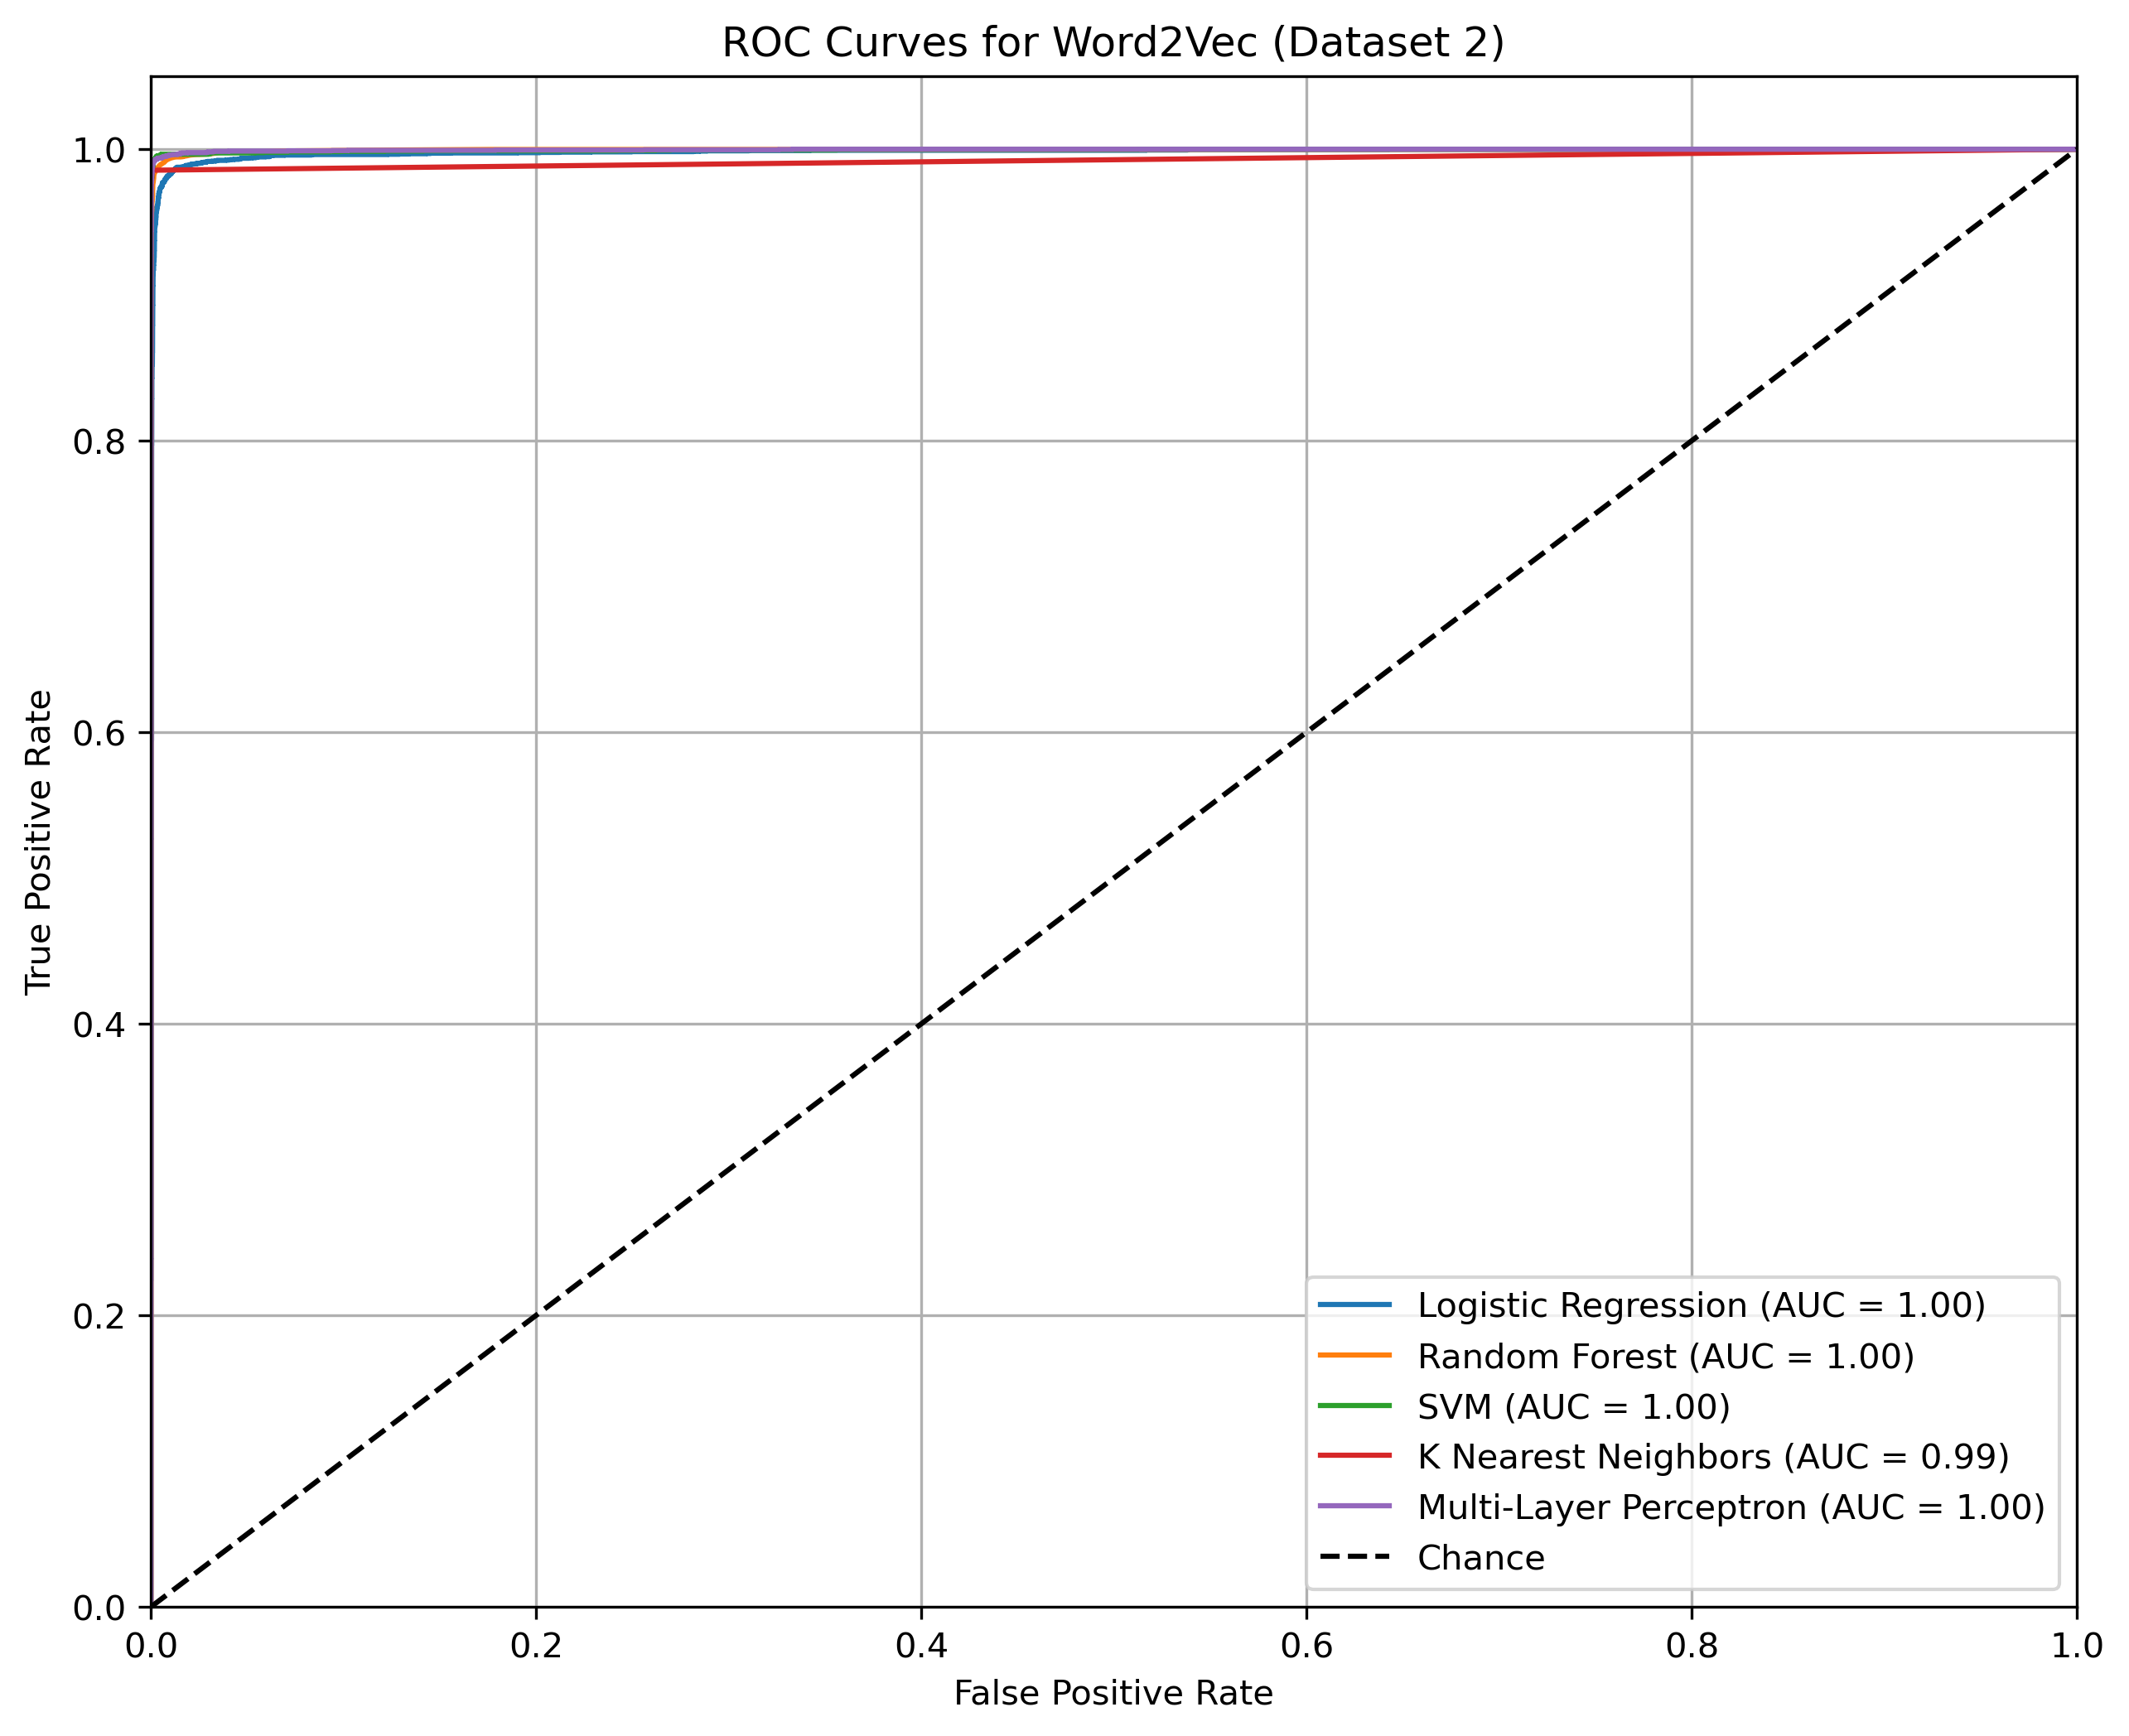

In [38]:
# ROC plot with higher dpi
model_files = [
    ('w2v_lr_model1.pkl', 'Logistic Regression'),
    ('w2v_rf_model1.pkl', 'Random Forest'),
    ('w2v_svc_model1.pkl', 'SVM'),
    ('w2v_knn_model1.pkl', 'K Nearest Neighbors'),
    ('w2v_mlp_model1.pkl', 'Multi-Layer Perceptron')
]
df_test_w2v_unstem.columns = df_test_w2v_unstem.columns.astype(str)
plt.figure(figsize=(10, 8), dpi=300)

for file, label in model_files:
    with open(file, 'rb') as f:
        model = pickle.load(f)
    try:
        y_proba = model.predict_proba(df_test_w2v_unstem)[:, 1]
    except AttributeError:
        y_proba = model.decision_function(df_test_w2v_unstem)

    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Word2Vec (Dataset 2)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()